# 12_2.Regression(예측)(연습문제1)
- https://www.statsmodels.org/stable/gettingstarted.html

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
mr_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/12_2.NeutralFat.csv', encoding="cp949")
mr_df.head()

,col,fat
0,108.4,44.1
1,110.4,40.9
2,127.1,44.3
3,128.2,50.5
4,131.7,77.3


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

### 2.3 자료구조 살펴보기

In [4]:
mr_df.shape

(60, 2)

In [5]:
mr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col     60 non-null     float64
 1   fat     60 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [6]:
mr_df.columns

Index(['col', 'fat'], dtype='object')

## 3.기술통계

In [7]:
# 그룹별 기술통계
mr_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
col,60.0,169.247,25.909,108.4,149.600,168.7,185.675,229.4
fat,60.0,105.527,50.590,40.9,64.525,98.8,137.850,228.2


## 4.Regression(예측)
- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
- 수치형 + 범주형
- dmatrix 사용


In [ ]:
# 기본
#formula = "fat ~ 연면적 + 품질 + 상태 + 건축년도 + 리모델링년도 + 지하면적 \
#            + 차고면적 + 면적_1층 + 면적_2층 \
#            + C(주거유형) + C(판매유형) + C(판매조건)"

In [9]:
# 코드 이용
columns = ['col']

formula = "fat ~ " + " + ".join(columns)
formula

'fat ~ col'

In [10]:
# dmatrix 이용
from patsy import dmatrices

y, X = dmatrices(formula,
                 data = mr_df,
                 return_type = 'dataframe')

In [11]:
X

,Intercept,col
0,1.0,108.4
1,1.0,110.4
2,1.0,127.1
3,1.0,128.2
4,1.0,131.7
5,1.0,134.8
6,1.0,136.7
7,1.0,142.4
8,1.0,142.5
9,1.0,143.6


In [12]:
model = sm.OLS(y, X)   # 모델 생성
result = model.fit()   # 모델 실행

In [13]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    fat   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     43.50
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           1.40e-08
Time:                        09:35:30   Log-Likelihood:                -303.27
No. Observations:                  60   AIC:                             610.5
Df Residuals:                      58   BIC:                             614.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -110.8193     33.178     -3.340      0.0

## 5.가정검정
- https://ethanweed.github.io/pythonbook/05.04-regression.html#regressionnormality
- 잔차의 등분산성: Breusch-Pagan
- 잔차의 정규성: Jarque-Bera, Omnibus(D'Angostino's test)
- 독립성(자기상관): Durbin-Watson
- 다중공선성(VIF): Cond. No

### 5.1 기본 검정
- 잔차의 정규성: Jarque-Bera, Omnibus(D'Angostino's test)
- 독립성(자기상관): Durbin-Watson
- 다중공선성(VIF): Cond. No

In [14]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    fat   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     43.50
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           1.40e-08
Time:                        09:35:38   Log-Likelihood:                -303.27
No. Observations:                  60   AIC:                             610.5
Df Residuals:                      58   BIC:                             614.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -110.8193     33.178     -3.340      0.0

### 5.2 잔차의 등분산 검정
- 잔차의 등분산성 테스트: Breush-Pagan 테스트:


In [15]:
# 잔차의 등분산성 테스트: Breush-Pagan 테스트:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 3.051708475917816),
 ('p-value', 0.08065225933317678),
 ('f-value', 3.1080667543535414),
 ('f p-value', 0.08317323757773465)]

In [16]:
# 잔차 플롯

# 표준화 잔차 생성
influence = result.get_influence()
res_standard = influence.resid_studentized_internal

# 예측값 생성
pred = result.predict(X)

# 데이터 프레임으로 생성
regplot_df = pd.DataFrame({'pred': pred, 'res_standard': res_standard})
regplot_df

,pred,res_standard
0,27.747121,0.449443
1,30.303697,0.290245
2,51.651101,-0.196734
3,53.057218,-0.068353
4,57.531225,0.526471
5,61.493917,-0.238812
6,63.922663,0.264479
7,71.208903,-0.546515
8,71.336732,-0.502351
9,72.742848,-0.818558


<Axes: >

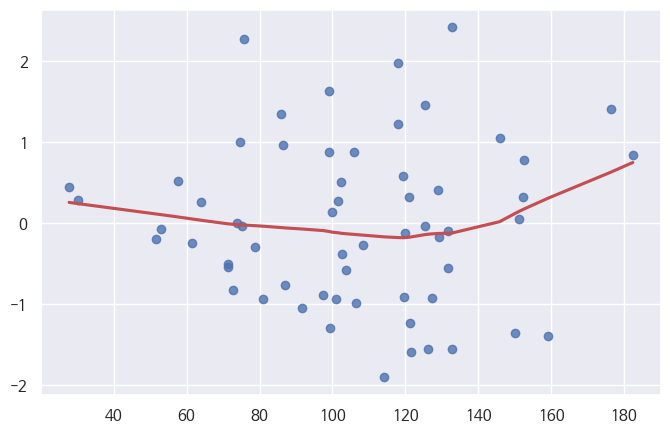

In [17]:
## 잔차 plot
plt.rc("figure", figsize=(8, 5))
sns.regplot(x = pred,
            y = res_standard,
            lowess = True,
            line_kws=dict(color="r"),
            data = regplot_df)

### 5.3 잔차의 정규성 검정

In [18]:
# shapiro test
pg.normality(result.resid)

,W,pval,normal
0,0.982801,0.557673,True


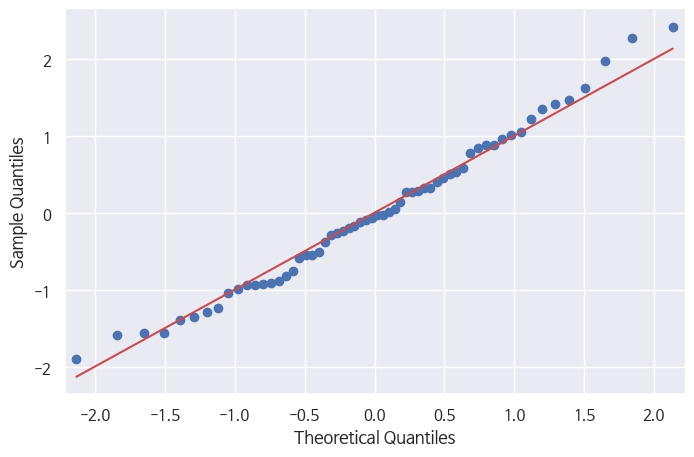

In [19]:
## QQ plot
plt.rc("figure", figsize=(8, 5))
sm.qqplot(res_standard, line = 's')
sns.despine()

### 5.4 이상치 제거

In [20]:
# 표준화 잔차를 이용한 이상치 확인
stud_res = result.outlier_test()
stud_res.sort_values(by = "student_resid", ascending = False).head(5)

,student_resid,unadj_p,bonf(p)
50,2.526612,0.014318,0.859059
13,2.365622,0.021424,1.000000
35,2.031057,0.046922,1.000000
21,1.649461,0.104554,1.000000
43,1.475345,0.145623,1.000000


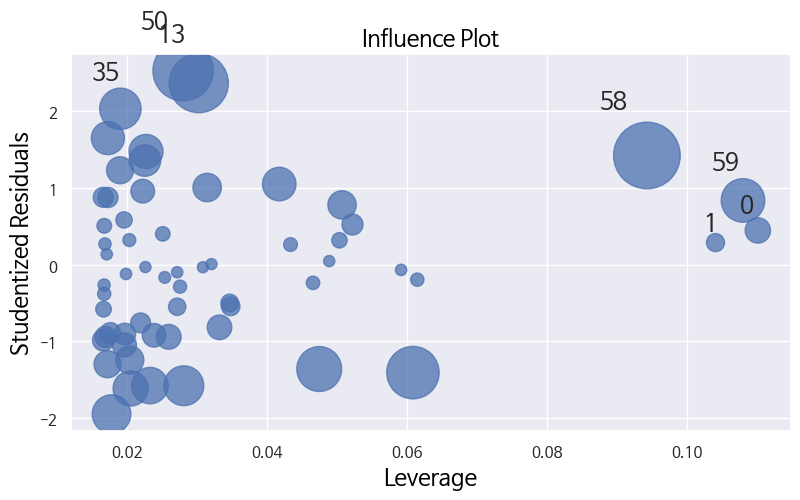

In [21]:
## cooks_distance를 이용한 이상치 확인
## https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

fig = sm.graphics.influence_plot(result, criterion="cooks")
plt.rc("figure", figsize=(8, 5))
plt.rc("font", size = 7)
fig.tight_layout(pad = 1.0)

In [22]:
# cooks_distance를 이용한 이상치 확인
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(result).cooks_distance
pd.DataFrame(test_class).T.sort_values(by = 0, ascending = False).head(10)

,0,1
58,0.103633,0.901722
50,0.084359,0.919214
13,0.081043,0.922259
57,0.063057,0.938954
53,0.045436,0.955614
59,0.042674,0.958254
35,0.038146,0.962597
51,0.035170,0.965461
33,0.032863,0.967689
44,0.028917,0.971511


In [ ]:
# 이상치 제거
# mr_df = mr_df.drop(120)

### 5.5 선형성

<Axes: xlabel='pred', ylabel='fat'>

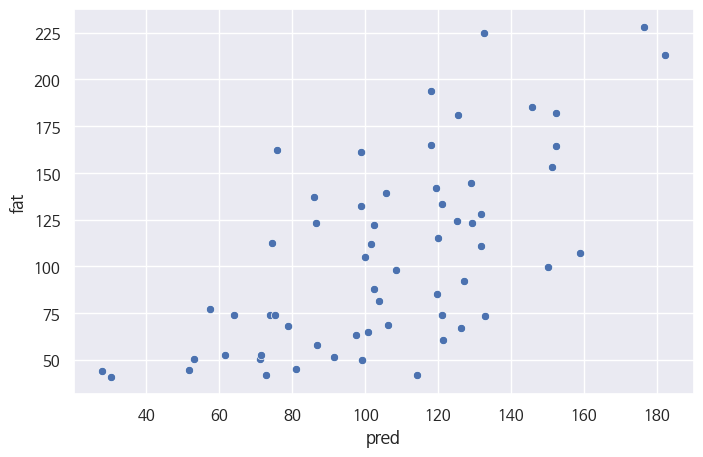

In [23]:
# 회귀도표: 예측치 vs 실제값
sns.scatterplot(x = regplot_df["pred"], y = mr_df["fat"])

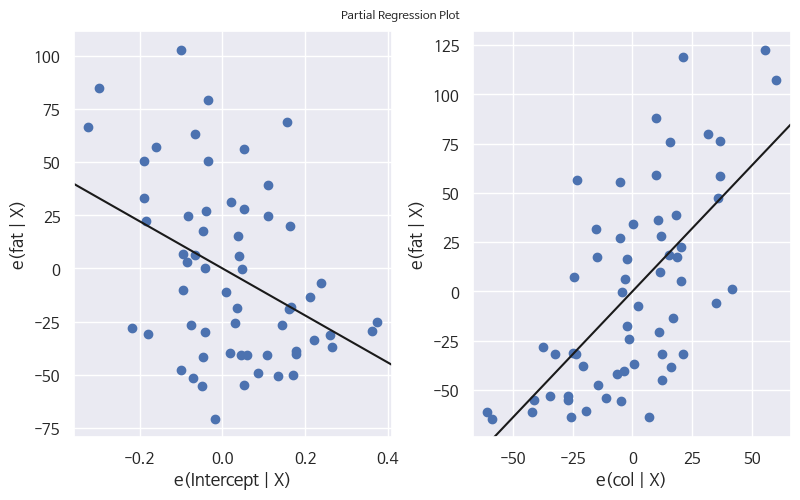

In [27]:
# 부분 회귀 도표
plt.rc("figure", figsize=(8, 5))
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout(pad = 1.0)

### 5.6 다중 공선성
- VIF 10이상 삭제

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.values.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

   VIF Factor   features
0        44.4  Intercept
1         1.0        col
